#Loading

In [ ]:
#IMPORT PACKAGES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

In [ ]:
#Import dataset         
df = pd.read_csv("covid_19_data.csv")
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15294,15295,4/15/2020,NaN,Trinidad and Tobago,4/15/2020 23:04,114,8,19
115532,115533,9/22/2020,Azad Jammu and Kashmir,Pakistan,9/23/2020 4:23,2566,70,2282
132463,132464,10/15/2020,NaN,Ethiopia,10/16/2020 4:24,87169,1325,40988
136368,136369,10/20/2020,British Virgin Islands,UK,10/21/2020 4:24,71,1,70
49281,49282,6/24/2020,Mayotte,France,6/25/2020 5:26,2467,32,2218
45652,45653,6/19/2020,Mizoram,India,6/20/2020 4:33,130,0,1
134583,134584,10/17/2020,Unknown,Colombia,10/18/2020 4:24,0,0,0
20239,20240,4/30/2020,Victoria,Australia,5/1/2020 2:32,1364,18,1293
15797,15798,4/17/2020,NaN,Cabo Verde,4/17/2020 23:38,56,1,1
150343,150344,11/8/2020,NaN,Guyana,11/9/2020 5:25,4514,134,3526


#EDA BEFORE PREPROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              156292 non-null  int64 
 1   ObservationDate  156292 non-null  object
 2   Province/State   111979 non-null  object
 3   Country/Region   156292 non-null  object
 4   Last Update      156292 non-null  object
 5   Confirmed        156292 non-null  int64 
 6   Deaths           156292 non-null  int64 
 7   Recovered        156292 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 9.5+ MB


#DATA CLEANING

In [ ]:
#Percentage of NAN Values 
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,SNo,0.000000
1,ObservationDate,0.000000
2,Province/State,28.352699
3,Country/Region,0.000000
4,Last Update,0.000000
5,Confirmed,0.000000
6,Deaths,0.000000
7,Recovered,0.000000


In [ ]:
df["Province/State"]= df["Province/State"].fillna('Unknown')

Data for trainning

In [ ]:
df_us=df
#Active_case
df_us['Active_case'] = df_us['Confirmed'] - df_us['Deaths'] - df_us['Recovered']

#Daily_new_case
cf = df_us.Confirmed.reset_index()
cf=cf.drop(columns='index').values
nc = [0]
for i in range(1,len(df_us['Confirmed'])):
  a = cf[i]-cf[i-1]
  nc.append(int(a))
df_us['Daily_new_case'] = nc

#new_deaths
d = df_us.Deaths.reset_index()
d=d.drop(columns='index').values
nd = [0]
for i in range(1,len(df_us['Deaths'])):
  a = d[i]-d[i-1]
  nd.append(int(a))
df_us['New_deaths'] = nd

#new_recovered
r = df_us.Deaths.reset_index()
r = r.drop(columns='index').values
nr = [0]
for i in range(1,len(df_us['Recovered'])):
  a = r[i]-r[i-1]
  nr.append(int(a))
df_us['New_recovered'] = nr

In [ ]:
df_us

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case,Daily_new_case,New_deaths,New_recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1,0,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14,13,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6,-8,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1,-5,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
156287,156288,11/15/2020,Zaporizhia Oblast,Ukraine,11/16/2020 5:25,18484,164,3021,15299,-900,-304,-304
156288,156289,11/15/2020,Zeeland,Netherlands,11/16/2020 5:25,5041,86,0,4955,-13443,-78,-78
156289,156290,11/15/2020,Zhejiang,Mainland China,11/16/2020 5:25,1291,1,1279,11,-3750,-85,-85
156290,156291,11/15/2020,Zhytomyr Oblast,Ukraine,11/16/2020 5:25,22225,368,12266,9591,20934,367,367


#US DATA


In [ ]:
dfus = pd.DataFrame()
dfus = df[df['Country/Region'] == 'US'].drop(columns='SNo')
dfus

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case,Daily_new_case,New_deaths,New_recovered
31,1/22/2020,Washington,US,1/22/2020 17:00,1,0,0,1,1,0,0
69,1/23/2020,Washington,US,1/23/2020 17:00,1,0,0,1,1,0,0
117,1/24/2020,Washington,US,1/24/2020 17:00,1,0,0,1,1,0,0
118,1/24/2020,Chicago,US,1/24/2020 17:00,1,0,0,1,0,0,0
158,1/25/2020,Washington,US,1/25/2020 17:00,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
156259,11/15/2020,Virginia,US,11/16/2020 5:25,201960,3800,0,198160,200526,3777,3777
156268,11/15/2020,Washington,US,11/16/2020 5:25,130040,2519,0,127521,108136,2519,2519
156271,11/15/2020,West Virginia,US,11/16/2020 5:25,33659,582,0,33077,-6434,582,582
156273,11/15/2020,Wisconsin,US,11/16/2020 5:25,329924,2751,0,327173,329137,2742,2742


In [ ]:
dfus = dfus.groupby(['ObservationDate']).sum()
dfus.reset_index(inplace=True)
dfus = dfus.rename(columns = {'index':'ObservationDate'})
dfus

,ObservationDate,Confirmed,Deaths,Recovered,Active_case,Daily_new_case,New_deaths,New_recovered
0,1/22/2020,1,0,0,1,1,0,0
1,1/23/2020,1,0,0,1,1,0,0
2,1/24/2020,2,0,0,2,1,0,0
3,1/25/2020,2,0,0,2,0,0,0
4,1/26/2020,5,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...
294,9/5/2020,6245036,188538,2302187,3754311,2764650,76693,76693
295,9/6/2020,6276434,188941,2315995,3771498,2747803,76382,76382
296,9/7/2020,6300697,189208,2333551,3777938,2733163,76002,76002
297,9/8/2020,6327086,189653,2359111,3778322,2718570,75690,75690


#Trainning demo

In [ ]:
df2=dfus[['ObservationDate','Active_case']]
#df2 = df2.iloc[5:,:]
df2.columns = ['ds','y']
#df2['ds'] = pd.to_datetime(df2.ds)
#df2['y'] = df2['y'].astype(float)
df2.dtypes

ds    object
y      int64
dtype: object

In [ ]:
import pandas as pd
from fbprophet import Prophet

m = Prophet(interval_width=0.8)
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=7)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
301,2020-11-18
302,2020-11-19
303,2020-11-20
304,2020-11-21


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(10)

,ds,yhat
296,2020-11-13,5.892492e+06
297,2020-11-14,5.931613e+06
298,2020-11-15,5.971786e+06
299,2020-11-16,5.986735e+06
300,2020-11-17,6.025491e+06
301,2020-11-18,6.061999e+06
302,2020-11-19,6.102705e+06
303,2020-11-20,6.148194e+06
304,2020-11-21,6.187314e+06
305,2020-11-22,6.227488e+06


In [ ]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
296,2020-11-13,5.886531e+06,5.760592e+06,6.027320e+06,5.886531e+06,5.886531e+06,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,0.0,0.0,0.0,5.892492e+06
297,2020-11-14,5.923060e+06,5.798095e+06,6.064444e+06,5.923060e+06,5.923060e+06,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,0.0,0.0,0.0,5.931613e+06
298,2020-11-15,5.959588e+06,5.834173e+06,6.098704e+06,5.959588e+06,5.959588e+06,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,0.0,0.0,0.0,5.971786e+06
299,2020-11-16,5.996117e+06,5.859622e+06,6.122635e+06,5.996117e+06,5.996117e+06,-9382.747596,-9382.747596,-9382.747596,-9382.747596,-9382.747596,-9382.747596,0.0,0.0,0.0,5.986735e+06
300,2020-11-17,6.032646e+06,5.897933e+06,6.160788e+06,6.032646e+06,6.032646e+06,-7155.379596,-7155.379596,-7155.379596,-7155.379596,-7155.379596,-7155.379596,0.0,0.0,0.0,6.025491e+06
301,2020-11-18,6.069175e+06,5.924758e+06,6.195376e+06,6.069175e+06,6.069518e+06,-7175.535635,-7175.535635,-7175.535635,-7175.535635,-7175.535635,-7175.535635,0.0,0.0,0.0,6.061999e+06
302,2020-11-19,6.105704e+06,5.959168e+06,6.242604e+06,6.104556e+06,6.107230e+06,-2998.315484,-2998.315484,-2998.315484,-2998.315484,-2998.315484,-2998.315484,0.0,0.0,0.0,6.102705e+06
303,2020-11-20,6.142232e+06,6.018959e+06,6.274186e+06,6.138512e+06,6.145724e+06,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,0.0,0.0,0.0,6.148194e+06
304,2020-11-21,6.178761e+06,6.055233e+06,6.318736e+06,6.171550e+06,6.184566e+06,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,0.0,0.0,0.0,6.187314e+06
305,2020-11-22,6.215290e+06,6.093838e+06,6.373067e+06,6.205149e+06,6.224108e+06,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,0.0,0.0,0.0,6.227488e+06


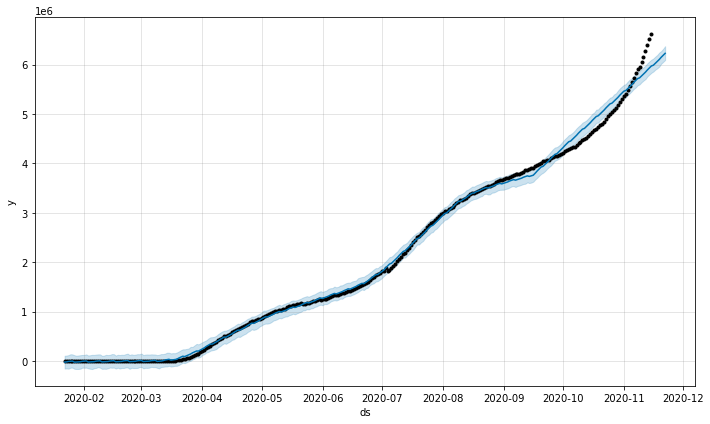

In [ ]:
plot_no = m.plot(forecast)

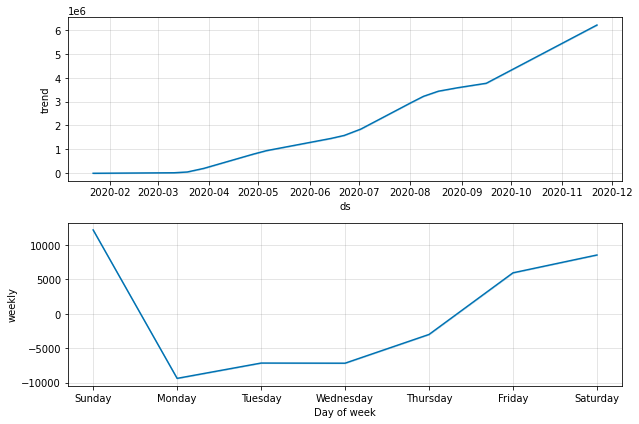

In [ ]:
confirm_forecast_plot = m.plot_components(forecast)

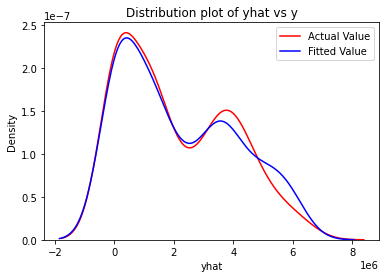

In [ ]:
Yhat = forecast.yhat
ax1 = sns.distplot(df2['y'], hist= False, color= 'r', label= 'Actual Value')
sns.distplot(Yhat, hist= False, color= 'b', label= 'Fitted Value', ax= ax1)
plt.title(f"Distribution plot of yhat vs y")
plt.legend()
plt.show()

#Define Model


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

In [ ]:
def data_in_(country,province,df):
  #loading
  df_us = df[df['Country/Region']==country].drop(columns='SNo')
  df_us = df_us[df_us['Province/State']==province]
  df_us = df_us.groupby(['ObservationDate']).sum()
  df_us.reset_index(inplace=True)
  df_us = df_us.rename(columns = {'index':'ObservationDate'})

  #Active_case
  df_us['Active_case'] = df_us['Confirmed'] - df_us['Deaths'] - df_us['Recovered']

  #Daily_new_case
  cf = df_us.Confirmed.reset_index()
  cf=cf.drop(columns='index').values
  nc = [0]
  for i in range(1,len(df_us['Confirmed'])):
    a = cf[i]-cf[i-1]
    nc.append(int(a))
  df_us['Daily_new_case'] = nc

  #new_deaths
  d = df_us.Deaths.reset_index()
  d=d.drop(columns='index').values
  nd = [0]
  for i in range(1,len(df_us['Deaths'])):
    a = d[i]-d[i-1]
    nd.append(int(a))
  df_us['New_deaths'] = nd

  #new_recovered
  r = df_us.Recovered.reset_index()
  r = r.drop(columns='index').values
  nr = [0]
  for i in range(1,len(df_us['Deaths'])):
    a = r[i]-r[i-1]
    nr.append(int(a))
  df_us['New_recovered'] = nr
    
  return df_us

In [ ]:
tokyo = data_in_('Japan','Hokkaido',df)
tokyo

,ObservationDate,Confirmed,Deaths,Recovered,Active_case,Daily_new_case,New_deaths,New_recovered
0,10/1/2020,2115,107,1848,160,0,0,0
1,10/10/2020,2336,107,1991,238,221,0,143
2,10/11/2020,2367,107,2012,248,31,0,21
3,10/12/2020,2379,107,2029,243,12,0,17
4,10/13/2020,2399,107,2050,242,20,0,21
...,...,...,...,...,...,...,...,...
167,9/5/2020,1813,105,1594,114,10,1,16
168,9/6/2020,1817,105,1607,105,4,0,13
169,9/7/2020,1823,105,1623,95,6,0,16
170,9/8/2020,1834,105,1641,88,11,0,18


In [ ]:
from fbprophet import Prophet

def model_(df_us,feature):
  df2=df_us[['ObservationDate',feature]]
  df2.columns = ['ds','y']
  m = Prophet(interval_width=0.8)
  m.fit(df2)
  
  future = m.make_future_dataframe(periods=7)
  forecast = m.predict(future)

  plot_no = m.plot(forecast)
  plot_trend = m.plot_components(forecast)
  plt.show()
  
  Yhat = forecast.yhat
  ax1 = sns.distplot(df2['y'], hist= False, color= 'r', label= 'Actual Value')
  sns.distplot(Yhat, hist= False, color= 'b', label= 'Fitted Value', ax= ax1)
  plt.title(f"Distribution plot of yhat vs y")
  plt.legend()
  plt.show()

  from sklearn.metrics import r2_score
  print(-r2_score(df2.y,Yhat[0:-7]))
  return m

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


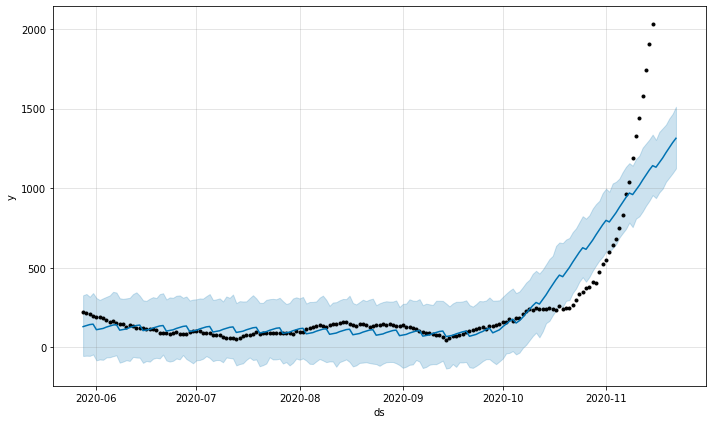

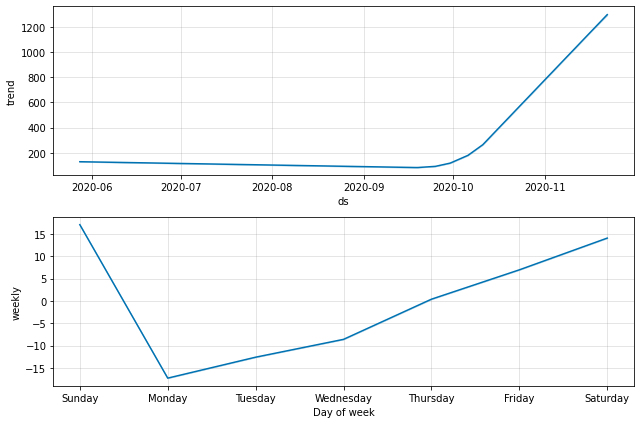

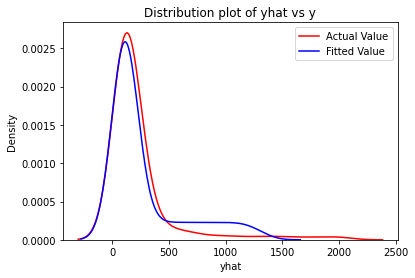

0.9342033455274279


In [ ]:
m = model_(tokyo,'Active_case')